In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize
import scipy.fftpack

In [2]:
distances = [84, 150, 200, 250, 300, 348]
V = np.array([])
Vstd1 = np.array([])
Vstd10 = np.array([])

for i in range(6):
    df=pd.read_csv(str(distances[i])+'mm/anag2.csv', header=None, squeeze = True)
    V = np.append(V,np.mean(df[1:])*5/4095)
    
    V_1s=[np.mean(df[1:1000])]
    
    for j in range(299):
        V_1s.append(np.mean(df[1000*(j+1):1000*(j+2)]))
    
    Vstd1 = np.append(Vstd1,np.std(V_1s)*5/4095)
    
    V_10s=[np.mean(df[1:10000])]
    
    for j in range(29):
        V_10s.append(np.mean(df[10000*(j+1):10000*(j+2)]))
    
    Vstd10 = np.append(Vstd10,np.std(V_10s)*5/4095)

In [3]:
C = np.array([])
Cstd1 = np.array([])
Cstd10 = np.array([])

for i in range(6):

    df=pd.read_csv(str(distances[i])+'mm/anag1.csv', header=None, squeeze = True)

    Caux = [np.sum(df[1:1000])]

    for j in range(299):
        Caux.append(np.sum(df[1000*(j+1):1000*(j+2)]))

    C = np.append(C,np.mean(Caux))
    
    Cstd1 = np.append(Cstd1, np.std(Caux))
    
    Caux10 = []
    
    for j in range(30):
        Caux10.append(np.mean(Caux[10*j:10*(j+1)]))
        
    Cstd10 = np.append(Cstd10,np.std(Caux10))

In [4]:
def rsi_fun(x, a, b):
    return a * x**-2 + b

def lin_fun(x, a, b):
    return a*x +b

Vfit = np.linspace(V[-1], V[0], 50)
Cfit = np.linspace(C[-1], C[0], 50)

popt, pconv = scipy.optimize.curve_fit(lin_fun, V[1:], C[1:])
ss_tot = np.sum((C-np.mean(C))**2)
residuals = C- lin_fun(V, *popt)
ss_res = np.sum(residuals**2)
r_squared = 1 - (ss_res / ss_tot)


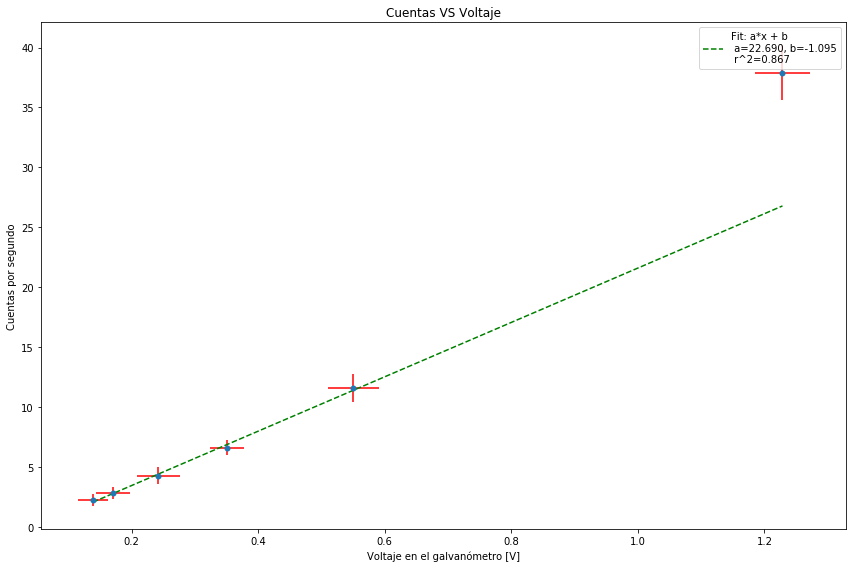

In [5]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12,8))

ax.errorbar(x=V, xerr=Vstd10, y=C, yerr=Cstd10, ecolor='red', marker='.', mew=3, ls='None')

ax.plot(Vfit, lin_fun(Vfit, *popt), 'g--', 
         label='Fit: a*x + b \n a=%5.3f, b=%5.3f'%tuple(popt)+'\n r^2=%5.3f'%r_squared)
ax.legend()

ax.set_xlabel('Voltaje en el galvanómetro [V]')
ax.set_ylabel('Cuentas por segundo')
ax.set_title('Cuentas VS Voltaje')

fig.tight_layout()

In [6]:
d = np.array(distances)*1.0

dfit = np.linspace(distances[0], distances[-1], 50)

popt_V, pconv_V = scipy.optimize.curve_fit(rsi_fun, d[1:], V[1:])
ss_tot_V = np.sum((V-np.mean(V))**2)
residuals_V = V- rsi_fun(d, *popt_V)
ss_res_V = np.sum(residuals_V**2)
r_squared_V = 1 - (ss_res_V / ss_tot_V)

popt_C, pconv_C = scipy.optimize.curve_fit(rsi_fun, d[1:], C[1:])
ss_tot_C = np.sum((C-np.mean(C))**2)
residuals_C = C- rsi_fun(d, *popt_C)
ss_res_C = np.sum(residuals_C**2)
r_squared_C = 1 - (ss_res_C / ss_tot_C)


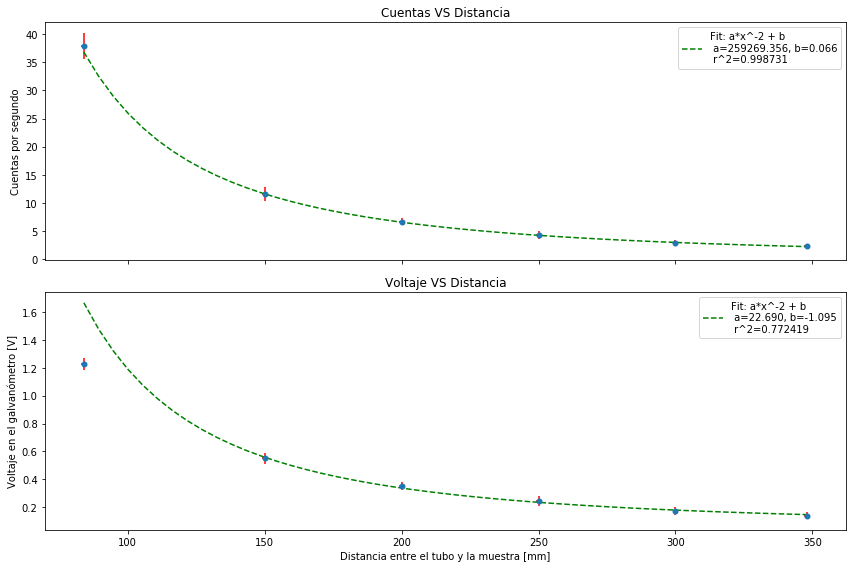

In [7]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,8))

ax[0].errorbar(x=d, xerr=1, y=C, yerr=Cstd10, ecolor='red', marker='.', mew=3, ls='None')

ax[0].plot(dfit, rsi_fun(dfit, *popt_C), 'g--', 
         label='Fit: a*x^-2 + b \n a=%5.3f, b=%5.3f'%tuple(popt_C)+'\n r^2=%5.6f'%r_squared_C)
ax[0].legend()

ax[0].set_ylabel('Cuentas por segundo')
ax[0].set_title('Cuentas VS Distancia')


ax[1].errorbar(x=d, xerr=1, y=V, yerr=Vstd10, ecolor='red', marker='.', mew=3, ls='None')

ax[1].plot(dfit, rsi_fun(dfit, *popt_V), 'g--', 
         label='Fit: a*x^-2 + b \n a=%5.3f, b=%5.3f'%tuple(popt)+'\n r^2=%5.6f'%r_squared_V)
ax[1].legend()


#ax[1].fill_between(d, V+Vstd10, V-Vstd10, facecolor='red', alpha=0.1)
#ax[1].fill_betweenx(V, d+1, d-1, facecolor='red', alpha=0.1)
ax[1].set_xlabel('Distancia entre el tubo y la muestra [mm]')
ax[1].set_ylabel('Voltaje en el galvanómetro [V]')
ax[1].set_title('Voltaje VS Distancia')

fig.tight_layout()

In [8]:
dosis = np.array([2.24*10**-1, 7.04*10**-2, 3.96*10**-2, 2.53*10**-2, 1.76*10**-2, 1.31*10**-2])

popt_DV, pconv_DV = scipy.optimize.curve_fit(lin_fun, V[1:], dosis[1:])
ss_tot_DV = np.sum((dosis-np.mean(dosis))**2)
residuals_DV = dosis- lin_fun(V, *popt_DV)
ss_res_DV = np.sum(residuals_DV**2)
r_squared_DV = 1 - (ss_res_DV / ss_tot_DV)

popt_DC, pconv_DC = scipy.optimize.curve_fit(lin_fun, C[1:], dosis[1:])
ss_tot_DC = np.sum((dosis-np.mean(dosis))**2)
residuals_DC = dosis- lin_fun(C, *popt_DC)
ss_res_DC = np.sum(residuals_DC**2)
r_squared_DC = 1 - (ss_res_DC / ss_tot_DC)

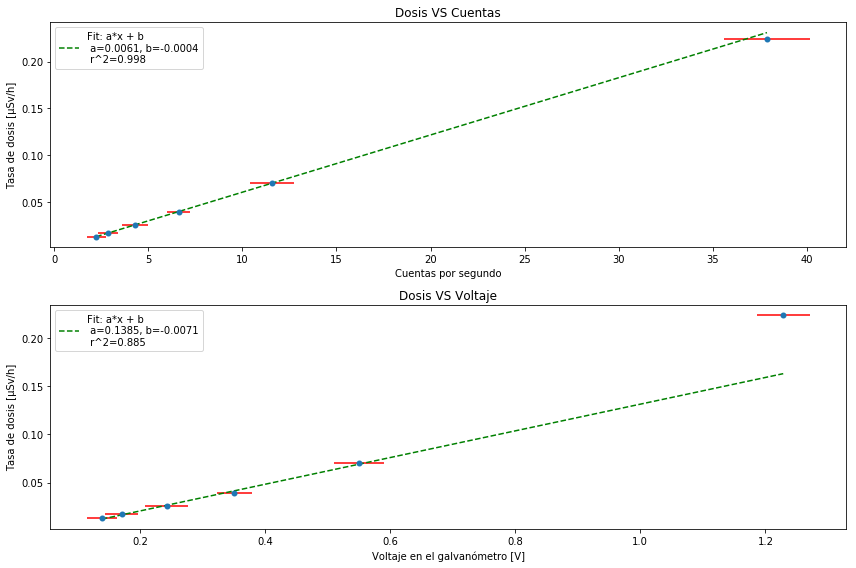

In [9]:
fig, ax = plt.subplots(2, 1, sharex=False, figsize=(12,8))

ax[0].errorbar(x=C, xerr=Cstd10, y=dosis, ecolor='red', marker='.', mew=3, ls='None')

ax[0].plot(Cfit, lin_fun(Cfit, *popt_DC), 'g--', 
         label='Fit: a*x + b \n a=%5.4f, b=%5.4f'%tuple(popt_DC)+'\n r^2=%5.3f'%r_squared_DC)

ax[0].legend()
ax[0].set_ylabel('Tasa de dosis [μSv/h]')
ax[0].set_xlabel('Cuentas por segundo')
ax[0].set_title('Dosis VS Cuentas')

ax[1].errorbar(x=V, xerr=Vstd10, y=dosis, ecolor='red', marker='.', mew=3, ls='None')

ax[1].plot(Vfit, lin_fun(Vfit, *popt_DV), 'g--', 
         label='Fit: a*x + b \n a=%5.4f, b=%5.4f'%tuple(popt_DV)+'\n r^2=%5.3f'%r_squared_DV)

ax[1].legend()

ax[1].set_ylabel('Tasa de dosis [μSv/h]')
ax[1].set_xlabel('Voltaje en el galvanómetro [V]')
ax[1].set_title('Dosis VS Voltaje')

fig.tight_layout()